# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset 

In [2]:
from keras.datasets import cifar10

In [3]:
(X_train ,y_train) ,(X_test ,y_test) = cifar10.load_data()

In [4]:
#cifar10 is a dataset that is including in the keras library
#It can be loaded into training n test data respectively 
#cifar10 includes airplanes,cars,birds,cats,deer,dogs,forgs,horses,ships,trucks

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_test.shape

(10000, 1)

# Visualizing the data 

[0]


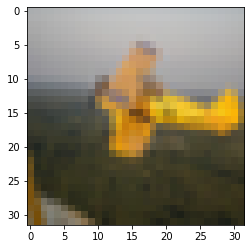

In [9]:
i=1234
plt.imshow(X_train[i])
#just seeing a random image
print(y_train[i])

In [10]:
#from the image , it is clear it is a 32 * 32 sized image and  it's resolution is very very low 

C:\Users\saamm\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


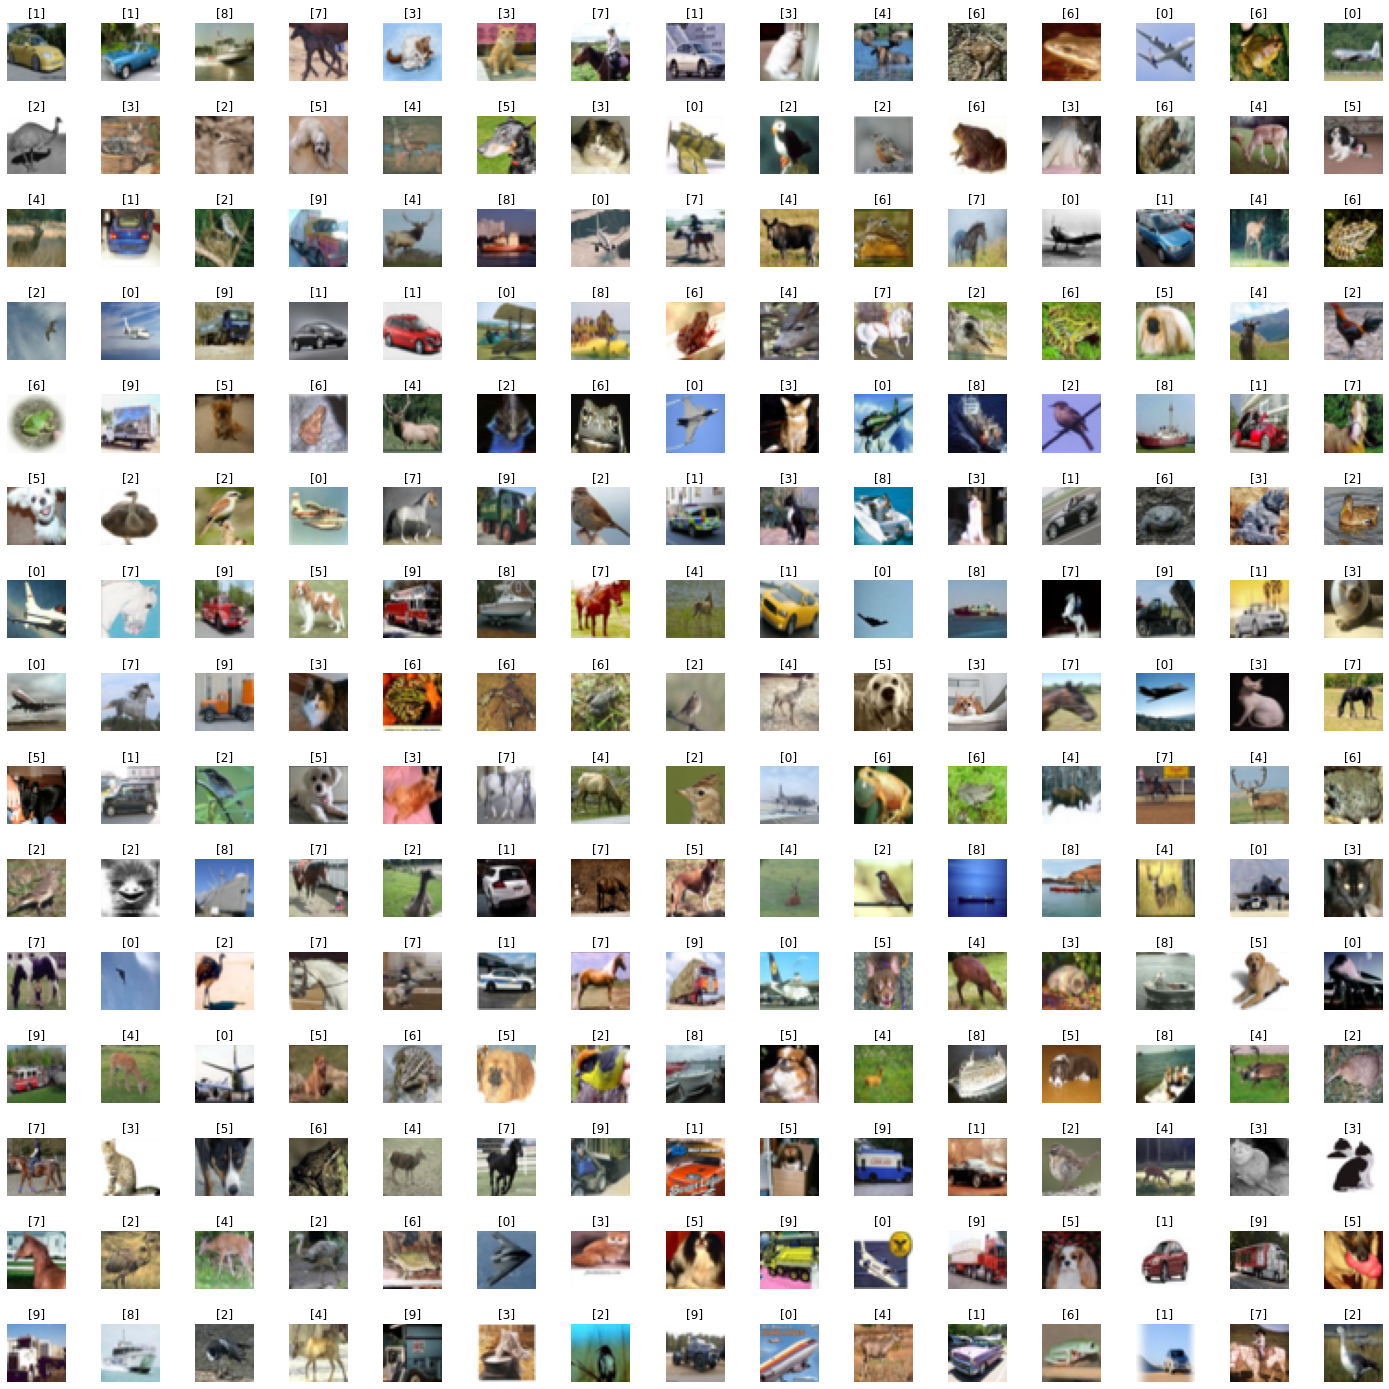

In [11]:
w_grid=15  #width
l_grid=15  #lenght
 
fig, axes = plt.subplots(l_grid,w_grid,figsize=(25,25))     #makes the grid
axes=axes.ravel()

n_training = len(X_train)                          #lenght of the training data

for i in np.arange(0,l_grid*w_grid):
    #looping through the grid 
    index=np.random.randint(0,n_training)          #selects a random number from 0 to n_training
    axes[i].imshow(X_train[index])                 #gives the image 
    axes[i].set_title(y_train[index])              #gives the class of the image 
    axes[i].axis("off")
    
plt.subplots_adjust(hspace=0.6)    #is used to give space between the cells of the grid

In [12]:
#The above is used to make a grid to visualize a bunch of images 

In [13]:
n_training

50000

# Preparing the data 

In [14]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [15]:
num_categories=10

In [16]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [17]:
import keras
y_train = keras.utils.to_categorical(y_train ,num_categories) #this was done to convert the decimal values in y_train to binary
y_test  = keras.utils.to_categorical(y_test ,num_categories)  #this was done to convert the decimal values in y_test to binary

In [18]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
  y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [20]:
X_train

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

In [21]:
X_train = X_train/255

In [22]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [23]:
X_test=X_test/255

In [24]:
X_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [25]:
X_train.shape

(50000, 32, 32, 3)

In [26]:
in_shape = X_train.shape[1:]

In [27]:
in_shape

(32, 32, 3)

# Training the data 

In [28]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, AvgPool2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [29]:
cnn_model = Sequential()

#first hidden layer
cnn_model.add(Conv2D(filters=64 ,kernel_size=(3,3), activation='relu' , input_shape = in_shape))  #first convolutional layer
cnn_model.add(Conv2D(filters=64 ,kernel_size=(3,3), activation='relu'))                           #second convolutional layer
cnn_model.add(MaxPool2D(2,2))  #pooling layer
cnn_model.add(Dropout(0.4))    #Dropping 40% of the neurons along with their weights

#second hidden layer
cnn_model.add(Conv2D(filters=64 ,kernel_size=(3,3), activation='relu'))  #first convolutional layer
cnn_model.add(Conv2D(filters=64 ,kernel_size=(3,3), activation='relu'))  #second convolutional layer
cnn_model.add(MaxPool2D(2,2))  #pooling layer
cnn_model.add(Dropout(0.3))    #Dropping 20% of the neurons along with their weights


cnn_model.add(Flatten())      #flattening

#once flatenning is done , its output is fed into a fully connected ANN

cnn_model.add(Dense(units=512 ,activation='relu'))   #first ann layer
cnn_model.add(Dense(units=512 ,activation='relu'))   #second ann layer 

cnn_model.add(Dense(units=10 ,activation='softmax')) #output layer

In [30]:
cnn_model.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.RMSprop(lr=0.001) , metrics = ['accuracy'])

In [31]:
history_log = cnn_model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 232s 148ms/step - loss: 1.5829 - accuracy: 0.4292
Epoch 2/10
1563/1563 [==============================] - 233s 149ms/step - loss: 1.1847 - accuracy: 0.5844
Epoch 3/10
1563/1563 [==============================] - 228s 146ms/step - loss: 1.0656 - accuracy: 0.6326
Epoch 4/10
1563/1563 [==============================] - 226s 145ms/step - loss: 1.0188 - accuracy: 0.6566
Epoch 5/10
1563/1563 [==============================] - 225s 144ms/step - loss: 0.9975 - accuracy: 0.6647
Epoch 6/10
1563/1563 [==============================] - 230s 147ms/step - loss: 0.9862 - accuracy: 0.6672
Epoch 7/10
1563/1563 [==============================] - 231s 148ms/step - loss: 0.9844 - accuracy: 0.6732
Epoch 8/10
1563/1563 [==============================] - 225s 144ms/step - loss: 0.9669 - accuracy: 0.6777
Epoch 9/10
1563/1563 [==============================] - 226s 145ms/step - loss: 0.9601 - accuracy: 0.6813
Epoch 10/10
1563/1563 [=======================

# Evaluation

In [32]:
eval = cnn_model.evaluate(X_test,y_test)
print('Accuracy on test data : {}'.format(eval[1]))

313/313 [==============================] - 12s 39ms/step - loss: 1.1329 - accuracy: 0.6228
Accuracy on test data : 0.6227999925613403


In [33]:
predicted_classes = cnn_model.predict_classes(X_test) 
predicted_classes

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([8, 8, 8, ..., 5, 0, 4], dtype=int64)

In [34]:
y_test = y_test.argmax(1)   #converts the binary values back into decimal

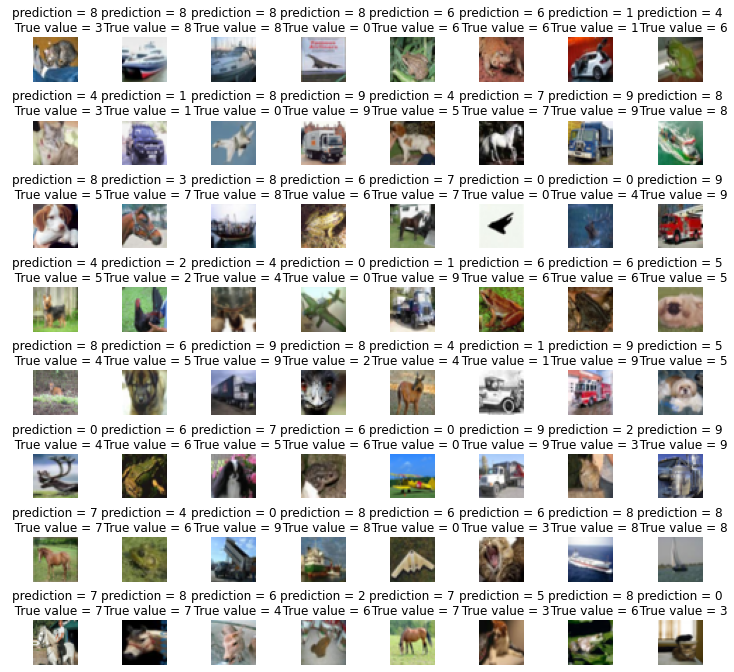

In [35]:
w=8
l=8
 
fig, axes = plt.subplots(l,w,figsize=(12,12))     #makes the grid
axes=axes.ravel()


for i in np.arange(0,l*w):
    #looping through the grid           
    axes[i].imshow(X_test[i])                  
    axes[i].set_title('prediction = {}\n  True value = {}'.format(predicted_classes[i],y_test[i]))        
    axes[i].axis('off')

    
plt.subplots_adjust(wspace=1)    #is used to give space between the cells of the grid

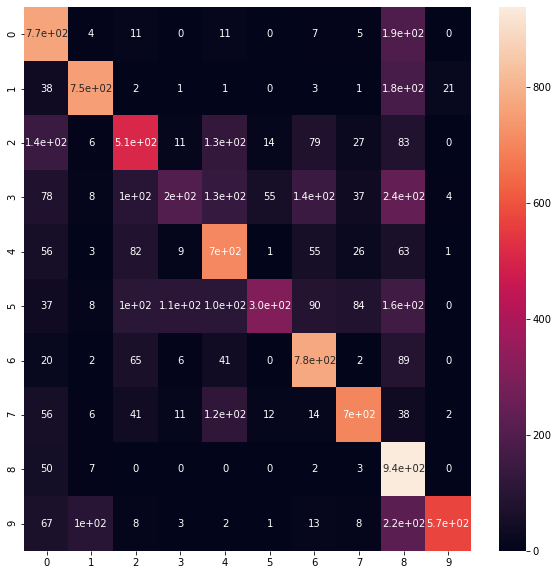

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)   #making the confusion matrix more appealing

# Saving the model 

In [ ]:
import os 
directory = os.path.join(os.getcwd(), 'saved_ml_models')

if not os.path.isdir(directory):  
    #if there isn't a directory , make a new one
    os.makedirs(directory)
    
model_path = os.path.join(directory, 'cifar10_trained_model.h5')
cnn_model.save(model_path)

# Data Augmentation for the dataset 

### This is just the to know how to do data augumentation

In [ ]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()   #importing dattaset and again splitting into training and test sets

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#converting both sets into floating type 

In [ ]:
X_train.shape

In [ ]:
#out of 50000 take just 8 for understanding
n = 8 
X_train_sample = X_train[:n]

In [ ]:
X_train_sample.shape

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

dataget_train = ImageDataGenerator(rotation_range = 90)          #rotate image between 0 and 90
# dataget_train = ImageDataGenerator(vertical_flip=True)           #flipping image
# dataget_train = ImageDataGenerator(height_shift_range=0.5)       #Shift in height by 50%
# dataget_train = ImageDataGenerator(brightness_range=(1,3))         #brightness


dataget_train.fit(X_train_sample)   #apply it only on the sample dataset

In [ ]:
import numpy as np
from PIL import Image


_errstr = "Mode is unknown or incompatible with input array shape."


def bytescale(data, cmin=None, cmax=None, high=255, low=0):
    """
    Byte scales an array (image).
    Byte scaling means converting the input image to uint8 dtype and scaling
    the range to ``(low, high)`` (default 0-255).
    If the input image already has dtype uint8, no scaling is done.
    This function is only available if Python Imaging Library (PIL) is installed.
    Parameters
    ----------
    data : ndarray
        PIL image data array.
    cmin : scalar, optional
        Bias scaling of small values. Default is ``data.min()``.
    cmax : scalar, optional
        Bias scaling of large values. Default is ``data.max()``.
    high : scalar, optional
        Scale max value to `high`.  Default is 255.
    low : scalar, optional
        Scale min value to `low`.  Default is 0.
    Returns
    -------
    img_array : uint8 ndarray
        The byte-scaled array.
    Examples
    --------
    >>> from scipy.misc import bytescale
    >>> img = np.array([[ 91.06794177,   3.39058326,  84.4221549 ],
    ...                 [ 73.88003259,  80.91433048,   4.88878881],
    ...                 [ 51.53875334,  34.45808177,  27.5873488 ]])
    >>> bytescale(img)
    array([[255,   0, 236],
           [205, 225,   4],
           [140,  90,  70]], dtype=uint8)
    >>> bytescale(img, high=200, low=100)
    array([[200, 100, 192],
           [180, 188, 102],
           [155, 135, 128]], dtype=uint8)
    >>> bytescale(img, cmin=0, cmax=255)
    array([[91,  3, 84],
           [74, 81,  5],
           [52, 34, 28]], dtype=uint8)
    """
    if data.dtype == np.uint8:
        return data

    if high > 255:
        raise ValueError("`high` should be less than or equal to 255.")
    if low < 0:
        raise ValueError("`low` should be greater than or equal to 0.")
    if high < low:
        raise ValueError("`high` should be greater than or equal to `low`.")

    if cmin is None:
        cmin = data.min()
    if cmax is None:
        cmax = data.max()

    cscale = cmax - cmin
    if cscale < 0:
        raise ValueError("`cmax` should be larger than `cmin`.")
    elif cscale == 0:
        cscale = 1

    scale = float(high - low) / cscale
    bytedata = (data - cmin) * scale + low
    return (bytedata.clip(low, high) + 0.5).astype(np.uint8)


def toimage(arr, high=255, low=0, cmin=None, cmax=None, pal=None,
            mode=None, channel_axis=None):
    """Takes a numpy array and returns a PIL image.
    This function is only available if Python Imaging Library (PIL) is installed.
    The mode of the PIL image depends on the array shape and the `pal` and
    `mode` keywords.
    For 2-D arrays, if `pal` is a valid (N,3) byte-array giving the RGB values
    (from 0 to 255) then ``mode='P'``, otherwise ``mode='L'``, unless mode
    is given as 'F' or 'I' in which case a float and/or integer array is made.
    .. warning::
        This function uses `bytescale` under the hood to rescale images to use
        the full (0, 255) range if ``mode`` is one of ``None, 'L', 'P', 'l'``.
        It will also cast data for 2-D images to ``uint32`` for ``mode=None``
        (which is the default).
    Notes
    -----
    For 3-D arrays, the `channel_axis` argument tells which dimension of the
    array holds the channel data.
    For 3-D arrays if one of the dimensions is 3, the mode is 'RGB'
    by default or 'YCbCr' if selected.
    The numpy array must be either 2 dimensional or 3 dimensional.
    """
    data = np.asarray(arr)
    if np.iscomplexobj(data):
        raise ValueError("Cannot convert a complex-valued array.")
    shape = list(data.shape)
    valid = len(shape) == 2 or ((len(shape) == 3) and
                                ((3 in shape) or (4 in shape)))
    if not valid:
        raise ValueError("'arr' does not have a suitable array shape for "
                         "any mode.")
    if len(shape) == 2:
        shape = (shape[1], shape[0])  # columns show up first
        if mode == 'F':
            data32 = data.astype(np.float32)
            image = Image.frombytes(mode, shape, data32.tostring())
            return image
        if mode in [None, 'L', 'P']:
            bytedata = bytescale(data, high=high, low=low,
                                 cmin=cmin, cmax=cmax)
            image = Image.frombytes('L', shape, bytedata.tostring())
            if pal is not None:
                image.putpalette(np.asarray(pal, dtype=np.uint8).tostring())
                # Becomes a mode='P' automagically.
            elif mode == 'P':  # default gray-scale
                pal = (np.arange(0, 256, 1, dtype=np.uint8)[:, np.newaxis] *
                       np.ones((3,), dtype=np.uint8)[np.newaxis, :])
                image.putpalette(np.asarray(pal, dtype=np.uint8).tostring())
            return image
        if mode == '1':  # high input gives threshold for 1
            bytedata = (data > high)
            image = Image.frombytes('1', shape, bytedata.tostring())
            return image
        if cmin is None:
            cmin = np.amin(np.ravel(data))
        if cmax is None:
            cmax = np.amax(np.ravel(data))
        data = (data*1.0 - cmin)*(high - low)/(cmax - cmin) + low
        if mode == 'I':
            data32 = data.astype(np.uint32)
            image = Image.frombytes(mode, shape, data32.tostring())
        else:
            raise ValueError(_errstr)
        return image

    # if here then 3-d array with a 3 or a 4 in the shape length.
    # Check for 3 in datacube shape --- 'RGB' or 'YCbCr'
    if channel_axis is None:
        if (3 in shape):
            ca = np.flatnonzero(np.asarray(shape) == 3)[0]
        else:
            ca = np.flatnonzero(np.asarray(shape) == 4)
            if len(ca):
                ca = ca[0]
            else:
                raise ValueError("Could not find channel dimension.")
    else:
        ca = channel_axis

    numch = shape[ca]
    if numch not in [3, 4]:
        raise ValueError("Channel axis dimension is not valid.")

    bytedata = bytescale(data, high=high, low=low, cmin=cmin, cmax=cmax)
    if ca == 2:
        strdata = bytedata.tostring()
        shape = (shape[1], shape[0])
    elif ca == 1:
        strdata = np.transpose(bytedata, (0, 2, 1)).tostring()
        shape = (shape[2], shape[0])
    elif ca == 0:
        strdata = np.transpose(bytedata, (1, 2, 0)).tostring()
        shape = (shape[2], shape[1])
    if mode is None:
        if numch == 3:
            mode = 'RGB'
        else:
            mode = 'RGBA'

    if mode not in ['RGB', 'RGBA', 'YCbCr', 'CMYK']:
        raise ValueError(_errstr)

    if mode in ['RGB', 'YCbCr']:
        if numch != 3:
            raise ValueError("Invalid array shape for mode.")
    if mode in ['RGBA', 'CMYK']:
        if numch != 4:
            raise ValueError("Invalid array shape for mode.")

    # Here we know data and mode is correct
    image = Image.frombytes(mode, shape, strdata)
    return image

In [ ]:
#since  scipy.misc.toimage isn't included in scipy version 1.3.0 onwards 
# the above cell contains the raw code for the toimage() function 
# making different variations of original images

fig = plt.figure(figsize = (20,2))

for x_batch in dataget_train.flow(X_train_sample, batch_size = n):
     for i in range(0,n):
            ax = fig.add_subplot(1, n, i+1)
            ax.imshow(toimage(x_batch[i]))
            
     fig.suptitle('Augmented images (rotated 90 degrees)')
     plt.show()
     break;


# Training the augmented model 

In [37]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                             )

In [38]:
datagen.fit(X_train)

In [39]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/2
1563/1563 [==============================] - 241s 154ms/step - loss: 1.7434 - accuracy: 0.3766
Epoch 2/2
1563/1563 [==============================] - 244s 156ms/step - loss: 1.6396 - accuracy: 0.4149


In [45]:
import os
# save the model
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'cifar10_trained_model_augmentation.h5')
cnn_model.save(model_path)